Here is an example of loading up the baseline simualtion and returning information about the visits that overlap a single point in the sky.

Installation instructions for rubin_sim can be found in the README at: https://github.com/lsst/rubin_sim

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import healpy as hp

import rubin_sim.maf as maf
import rubin_sim.utils as rsUtils
from rubin_sim.data import get_baseline

In [2]:
# Grab the current baseline file. Should have been downloaded with rubin_sim. 
# Can grab lots of different sims from: http://astro-lsst-01.astro.washington.edu:8081/
baseline_file = get_baseline()
name = os.path.basename(baseline_file).replace('.db','')
out_dir = 'temp'
results_db = maf.db.ResultsDb(out_dir=out_dir)

In [8]:
bundle_list = []
# The point on the sky we would like to get visits for
ra = [0.]
dec = [-20]


# Say we just want to pass data through, not compute anything. Documentation on 
# columns at:  https://rubin-sim.lsst.io/rs_scheduler/output_schema.html
metric = maf.metrics.PassMetric(cols=['filter', 'observationStartMJD', 'fiveSigmaDepth', 'visitExposureTime'])
# Select all the visits. Could be something like "filter='r'", "night < 365", etc
sql = ''
slicer = maf.slicers.UserPointsSlicer(ra=ra, dec=dec)
bundle_list.append(maf.MetricBundle(metric, slicer, sql, run_name=name))

In [9]:
bd = maf.metricBundles.make_bundles_dict_from_list(bundle_list)
bg = maf.metricBundles.MetricBundleGroup(bd, baseline_file, out_dir=out_dir, results_db=results_db)
bg.run_all()


In [7]:
# Our bundleList now has values. The trailing [0] is to get the first result. If we specified more
# ra,dec point, those results would be in the later indices.
bundle_list[0].metric_values[0][0:10]

rec.array([('i', 23.53705506, 358.66965277, -21.40199934, 63077.24779799, 105.5438157 ),
           ('z', 23.04979756, 358.79558706, -21.39965042, 61686.07639785, 148.61547835),
           ('y', 21.93141169, 358.98838919, -21.31559264, 63131.28601212, 271.76787752),
           ('i', 23.53797343, 358.79558706, -21.39965042, 61686.05254425, 148.61547835),
           ('y', 21.79369497, 359.82185437, -21.65400137, 63087.4007013 , 170.37853791),
           ('r', 23.41730112, 359.35325517, -21.82328775, 61058.04417192, 169.27456213),
           ('i', 23.26455729, 359.67629724, -21.31833345, 62395.07582762, 163.80251532),
           ('r', 23.37715788, 359.82185437, -21.65400137, 63087.40930279, 172.83754472),
           ('z', 23.18528842, 359.74562067, -21.55560892, 62468.10340286, 251.08949574),
           ('r', 24.44638033, 359.54598973, -21.36204984, 63835.20216099,  58.72031126)],
          dtype=[('filter', 'O'), ('fiveSigmaDepth', '<f8'), ('fieldRA', '<f8'), ('fieldDec', '<f8'), ('obser

Text(0.5, 1.0, 'baseline_v3.0_10yrs\nObservations at ra=0.000, dec=-20.000')

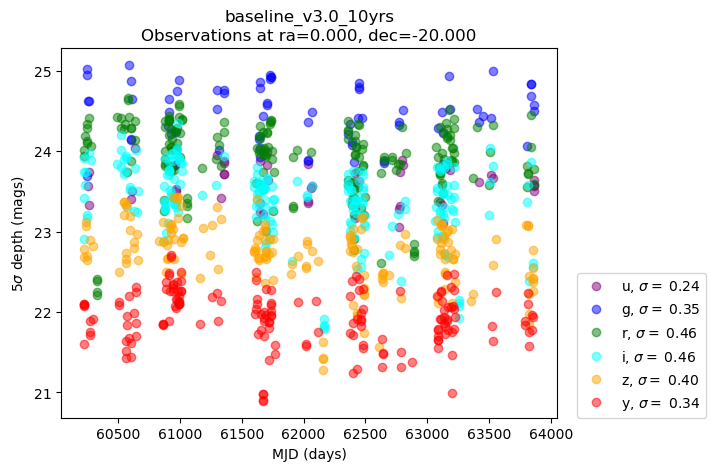

In [6]:
# As a bit of foreshadowing for how the rest of MAF works, we'll call the visits overlapping a
# single point in the sky "dataSlice". 
data_slice = bundle_list[0].metric_values[0]

# Let's plot up what the 5-sigma depth looks like
plt.figure()
# Give each filter it's own color
f2c = {'u': 'purple', 'g': 'blue', 'r': 'green',
       'i': 'cyan', 'z': 'orange', 'y': 'red'}
for fn in f2c:
    in_filt = np.where(data_slice['filter'] == fn)[0]
    plt.plot(data_slice['observationStartMJD'][in_filt],
             data_slice['fiveSigmaDepth'][in_filt], 'o',
             color=f2c[fn],
             label=fn+r', $\sigma=$ %.2f' % (np.std(data_slice['fiveSigmaDepth'][in_filt])),
             alpha=0.5)
plt.xlabel('MJD (days)')
plt.ylabel(r'5$\sigma$ depth (mags)')
plt.legend(loc=(1.04,0))
plt.title('%s\nObservations at ra=%.3f, dec=%.3f' % (name, ra[0],dec[0]))

Text(0.5, 1.0, 'baseline_v3.0_10yrs\nObservations at ra=0.000, dec=-20.000')

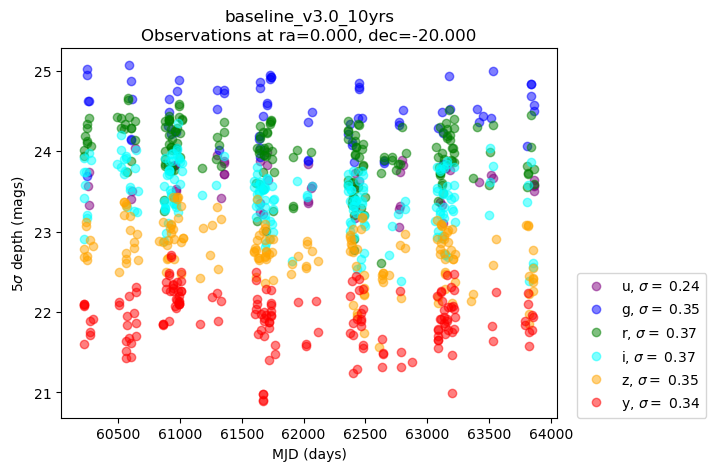

In [10]:
# Note there are some odd low-depth outliers. Those are probably the 1x15s
# twilight time exposures. let's try filtering those out

data_slice = bundle_list[0].metric_values[0]

# crop off short exposure times
data_slice = data_slice[np.where(data_slice["visitExposureTime"] > 25.)]

# Let's plot up what the 5-sigma depth looks like
plt.figure()
# Give each filter it's own color
f2c = {'u': 'purple', 'g': 'blue', 'r': 'green',
       'i': 'cyan', 'z': 'orange', 'y': 'red'}
for fn in f2c:
    in_filt = np.where(data_slice['filter'] == fn)[0]
    plt.plot(data_slice['observationStartMJD'][in_filt],
             data_slice['fiveSigmaDepth'][in_filt], 'o',
             color=f2c[fn],
             label=fn+r', $\sigma=$ %.2f' % (np.std(data_slice['fiveSigmaDepth'][in_filt])),
             alpha=0.5)
plt.xlabel('MJD (days)')
plt.ylabel(r'5$\sigma$ depth (mags)')
plt.legend(loc=(1.04,0))
plt.title('%s\nObservations at ra=%.3f, dec=%.3f' % (name, ra[0],dec[0]))

Text(0.5, 1.0, 'baseline_v3.0_10yrs\nObservations at ra=0.000, dec=-20.000')

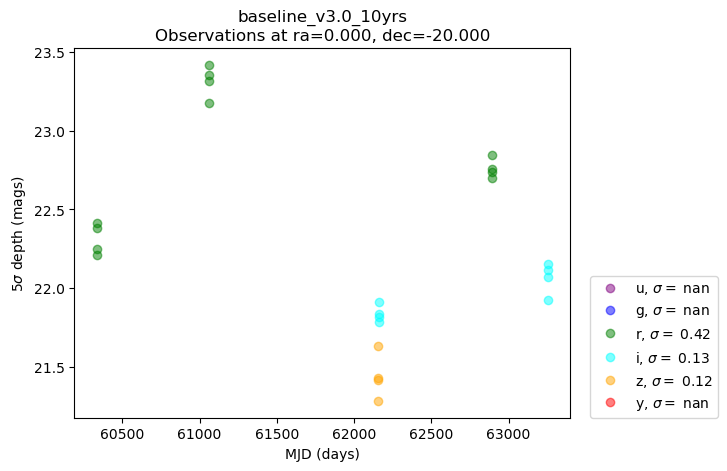

In [12]:
# and now looking only at short exposure times

data_slice = bundle_list[0].metric_values[0]

# crop off short exposure times
data_slice = data_slice[np.where(data_slice["visitExposureTime"] < 25.)]

# Let's plot up what the 5-sigma depth looks like
plt.figure()
# Give each filter it's own color
f2c = {'u': 'purple', 'g': 'blue', 'r': 'green',
       'i': 'cyan', 'z': 'orange', 'y': 'red'}
for fn in f2c:
    in_filt = np.where(data_slice['filter'] == fn)[0]
    plt.plot(data_slice['observationStartMJD'][in_filt],
             data_slice['fiveSigmaDepth'][in_filt], 'o',
             color=f2c[fn],
             label=fn+r', $\sigma=$ %.2f' % (np.std(data_slice['fiveSigmaDepth'][in_filt])),
             alpha=0.5)
plt.xlabel('MJD (days)')
plt.ylabel(r'5$\sigma$ depth (mags)')
plt.legend(loc=(1.04,0))
plt.title('%s\nObservations at ra=%.3f, dec=%.3f' % (name, ra[0],dec[0]))